In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import os
import glob
import pandas as pd
mpl.rcParams['figure.dpi'] = 70

In [5]:
def preprocess(dir_path, cut_len):
    M = []
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        df = pd.read_csv(file)
        reward, time_step = df['reward'].values, df['step'].values
        n = int(np.ceil(time_step[-1]/1e3))*1000
        x = range(n)
        y = np.interp(x,  time_step, reward)
        if cut_len != None:
            x = x[:cut_len]
            y = y[:cut_len]
        M.append(y)
    M = np.vstack(M)
    return M

def line_95_percent(result_path, label=None, color=None, linewidth=3, alpha=0.3, cut_len=None):
    cummulative_regret = preprocess(result_path, cut_len)
#     print(cummulative_regret.shape)

    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1#.96
    l = m - s * 1#.96
    plt.plot(m, label=label, color=color, linewidth=linewidth, alpha=0.8)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

def plot_lines(dir_path):
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        print(file)
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
            x = range(n)
            y = np.interp(x,  time_step, reward)
            plt.plot(x, y)



def preprocess_episode(dir_path):
    M = []
    print(dir_path)
    for file in glob.glob('{}/result*'.format(dir_path)):
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            M.append(reward)
    m0 = np.min([len(m) for m in M])
    M = [m[:m0] for m in M]
    M = np.vstack(M)
    return M

def line_95_percent_episode(result_path, label=None, color=None, linewidth=3, alpha=0.3, cut_len=None):
    cummulative_regret = preprocess_episode(result_path)
#     print(cummulative_regret.shape)

    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1#.96
    l = m - s * 1#.96
    plt.plot(m, label=label, color=color, linewidth=linewidth, alpha=0.8)
#     plt.plot(m, label=label,linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=alpha)

# reward =0 if reach right side, optimistic initialization

In [2]:
cd ../tmp

/home/oong/oppoliter/tmp


bot-opt-v94
bot-egreedy-v25
bot-vi-v39


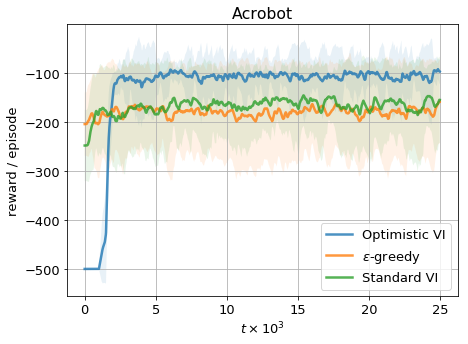

In [6]:
#sample len 2
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams.update({'font.size': 13})
plt.grid()
alpha=0.1
lw=2.5
line_95_percent('bot-opt-v94', label=r'Optimistic VI', linewidth=lw, alpha=alpha)
line_95_percent('bot-egreedy-v25', label='$\epsilon$-greedy', linewidth=lw, alpha=alpha)
line_95_percent('bot-vi-v39', label='Standard VI', linewidth=lw, alpha=alpha)
plt.xticks(range(0, 26000, 5000), range(0,26,5))
plt.xlabel(r'$t\times 10^3$')
plt.ylabel('reward / episode')
plt.legend()
plt.title('Acrobot')
plt.savefig('../notebook/acrobot.pdf')